In [4]:
%matplotlib inline
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
def plot_feature_pie(fs_list,filename=None,order=True):
    
    ## First read in the features (either after FS or provided)

    if type(fs_list) == list:
        feature_list = fs_list
    else:
        FS_df = pd.read_csv(fs_list)
        feature_list = FS_df['feature_added'].tolist()
        
    ## Preallocate lists to separate the properties...
    mclist, mclist_feature = [], [] #mc property
    coord1shell, coord1shell_feature = [], [] #1st coord shell property
    coord2shell, coord2shell_feature = [], [] #2nd coord shell property
    coord3shell, coord3shell_feature = [], [] #3rd coord shell property
    globallist, globallist_feature = [], [] #Global property
    
    #Loop over the features and assign to corresponding list. Currently dent is an mc feature.
    for feature in feature_list:
        print(feature)
        if (feature == 'spin') or (feature == 'ox') or 'dent' in feature:
#             mclist.append('spin/ox')
            mclist.append(feature)
            mclist_feature.append(feature)
            continue
        if feature == 'alpha': #alpha treated as a global feature
            globallist.append(feature)
            continue
        depth = int(feature.split('-')[2])
        scope = feature.split('-')[0]
        prop = feature.split('-')[1]
        print(depth,scope,prop)
        if scope == 'f':
            globallist.append(prop)
        elif scope in ['mc','D_mc']:
            if depth == 0:
                mclist.append(prop)
                mclist_feature.append(feature)
            elif depth == 1:
                coord1shell.append(prop)
                coord1shell_feature.append(feature)
            elif depth == 2:
                coord2shell.append(prop)
                coord2shell_feature.append(feature)
            elif depth == 3:
                coord3shell.append(prop)
                coord3shell_feature.append(feature)
        elif scope in ['lc','D_lc']:
            if depth == 0:
                coord1shell.append(prop)
                coord1shell_feature.append(feature)
            elif depth == 1:
                coord2shell.append(prop)
                coord2shell_feature.append(feature)
            elif depth == 2:
                coord3shell.append(prop)
                coord3shell_feature.append(feature)
            elif depth == 3:
                globallist.append(prop)
                globallist_feature.append(feature)
    if 'spin' in mclist and 'ox' in mclist:
        mclist.remove('spin')
        mclist.remove('ox')
        mclist.append('spin/ox')
        mclist.append('spin/ox')
    ## At this point, all of the separate lists are assigned.
    group_names=['Metal', '1st', '2nd','3rd','Global']
    
    ## See how many features are in each coordination shell
    group_size=[len(mclist), len(coord1shell), len(coord2shell), len(coord3shell), len(globallist)]
    
    ## Get the number of unique types of features in each coordination shell
    featurelists_set = [set(mclist), set(coord1shell),set(coord2shell), set(coord3shell), set(globallist)]
    
    ## Gets the lists of lists with all of the features in each shell
    featurelists = [mclist, coord1shell,coord2shell, coord3shell, globallist]
    
    ## Gives the names of types of features present in each coordination shell
    subnames = [str(feature) for group in featurelists_set for feature in group]

    ## Counts the numbers of in the lists of lists noted above
    fcount = [int(group.count(feature)) for group in featurelists for feature in set(group)]
    
    ## Set how faded or not faded each property will be
    alpha_dict = {'I':0.7,'S':0.6,'T':0.5,'Z':0.4,'chi':0.3,'spin/ox':0.2,'spin':0.2,'ox':0.2,'alpha':0.1}
    
    ## Define all of teh
    red = np.divide([float(255), float(0), float(0)],float(255))
    orange = np.divide([float(255), float(165), float(0)],float(255))
    green = np.divide([float(0), float(196), float(64)],float(255))
    blue = np.divide([float(0), float(0), float(255)],float(255))
    gray = np.divide([float(140), float(140), float(140)],float(255))
    white = [1, 1, 1]

    def make_rgb_transparent(rgb, bg_rgb, alpha):
        return [alpha * c1 + (1 - alpha) * c2
                for (c1, c2) in zip(rgb, bg_rgb)]

    # First Ring (outside)
    fig, ax = plt.subplots()
    ax.axis('equal')
    first_colors = [blue, red, green, orange, gray]
    if order:
        group_size = group_size[::-1]
        group_names= group_names[::-1]
        first_colors = first_colors[::-1]
    for i, val in enumerate(group_size):
        print(val)
        if val == 0:
            group_names[i] = ''
    print(group_names)
    mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=first_colors )
    plt.setp( mypie, width=0.3, edgecolor='white')

    # Second Ring (Inside))
    colorslist = []
    fulllist = []
    for i, val in enumerate(featurelists_set):
        sorted_fcount = sorted(val)
        [fulllist.append(sortedf) for sortedf in sorted_fcount]
        if i == 0:
            [colorslist.append(make_rgb_transparent(blue,white,alpha_dict[i])) for i in sorted_fcount]
        elif i == 1:
            [colorslist.append(make_rgb_transparent(red,white,alpha_dict[i])) for i in sorted_fcount]
        elif i == 2:
            [colorslist.append(make_rgb_transparent(green,white,alpha_dict[i])) for i in sorted_fcount]
        elif i == 3:
            [colorslist.append(make_rgb_transparent(orange,white,alpha_dict[i])) for i in sorted_fcount]
        elif i == 4:
            [colorslist.append(make_rgb_transparent(gray,white,alpha_dict[i])) for i in sorted_fcount]

    subnames = [x if x != 'chi' else '$\chi$' for x in subnames]
    subnames = [x if x != 'alpha' else r'$\alpha$' for x in subnames]
    if order:
        fcount = fcount[::-1]
        subnames = subnames[::-1]
        colorslist = colorslist[::-1]

    mypie2, _ = ax.pie(fcount, radius=1.3-0.3, labels=subnames, 
                       labeldistance=0.8, 
                       colors=colorslist,rotatelabels=True)
    if filename:
        if not filename.endswith('.pdf'):
            plt.savefig(str(filename)+'.pdf')
        else:
            plt.savefig(str(filename))
# plot_feature_pie(['D_mc-chi-1-all','ox','alpha','D_mc-Z-1-all','mc-Z-1-all','D_mc-S-1-all','mc-S-1-all','mc-Z-0-all','mc-Z-2-all',
#                  'mc-S-0-all','mc-chi-0-all','D_lc-Z-1-eq','D_lc-chi-1-eq','lc-Z-0-eq','lc-chi-0-eq','mc-chi-1-all',
#                  'D_mc-chi-2-all','mc-S-2-all','D_mc-Z-2-all','f-S-1-all','f-S-2-all','D_mc-S-2-all','f-chi-3-all',
#                  'f-S-0-all','mc-chi-2-all','f-Z-1-all'],filename='RF26.pdf')

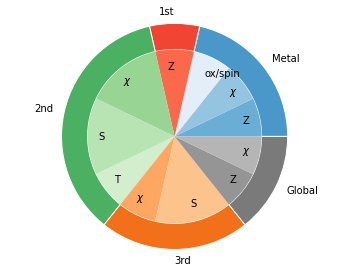

In [5]:
%matplotlib inline
# Libraries
import matplotlib.pyplot as plt
 
group_names_14=['Metal', '1st', '2nd','3rd','Global']
group_size_14=[3,1,5,3,2]
subgroup_names_14=['Z','$\chi$','ox/spin','Z','$\chi$','S','T','$\chi$','S','Z','$\chi$']
subgroup_size_14=[1,1,1,1,2,2,1,1,2,1,1]
 
# Create colors
a, b, c, d, e=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Oranges,plt.cm.Greys]
Z = 0.5
Chi = 0.4
S = 0.3
T = 0.2
Ox = 0.1

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size_14, radius=1.3, labels=group_names_14, colors=[a(0.6), b(0.6), c(0.6), d(0.6),e(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside))
# plt.setp( mypie2, width=0.4, edgecolor='white')
mypie2, _ = ax.pie(subgroup_size_14, radius=1.3-0.3, labels=subgroup_names_14, 
                   labeldistance=0.8, 
                   colors=[a(Z),a(Chi),a(Ox),b(Z),c(Chi),c(S),c(T),d(Chi),d(S),e(Z),e(Chi)])
# plt.margins(0,0)
 
# show it
#Oxo22
# plt.savefig('Oxo14.pdf')

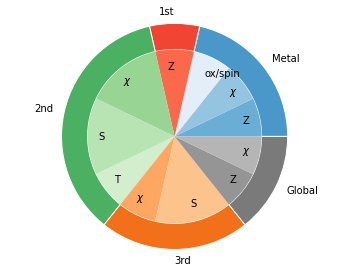

In [9]:
%matplotlib inline
# Libraries
import matplotlib.pyplot as plt
 
group_names_homo=['Metal', '1st', '2nd','3rd','Global']
group_size_homo=[3,1,5,3,2]
subgroup_names_homo=['Z','$\chi$','ox/spin','Z','$\chi$','S','T','$\chi$','S','Z','$\chi$']
subgroup_size_homo=[1,1,1,1,2,2,1,1,2,1,1]
 
# Create colors
a, b, c, d, e=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Oranges,plt.cm.Greys]
Z = 0.5
Chi = 0.4
S = 0.3
T = 0.2
Ox = 0.1

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size_homo, radius=1.3, labels=group_names_homo, colors=[a(0.6), b(0.6), c(0.6), d(0.6),e(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside))
# plt.setp( mypie2, width=0.4, edgecolor='white')
mypie2, _ = ax.pie(subgroup_size_homo, radius=1.3-0.3, labels=subgroup_names_homo, 
                   labeldistance=0.8, 
                   colors=[a(Z),a(Chi),a(Ox),b(Z),c(Chi),c(S),c(T),d(Chi),d(S),e(Z),e(Chi)])
# plt.margins(0,0)
 
# show it
#Oxo22
# plt.savefig('Oxo14.pdf')

In [10]:
len(['D_mc-chi-1-all','ox','D_mc-Z-1-all','mc-Z-1-all','D_mc-S-1-all','mc-S-1-all','mc-Z-0-all','mc-Z-2-all',
                 'mc-S-0-all','mc-chi-0-all','alpha','D_lc-Z-1-eq','D_lc-chi-1-eq','lc-Z-0-eq','lc-chi-0-eq','mc-chi-1-all',
                 'D_mc-chi-2-all','mc-S-2-all','D_mc-Z-2-all','f-S-1-all','f-S-2-all','D_mc-S-2-all','f-chi-3-all',
                 'f-S-0-all','mc-chi-2-all','f-Z-1-all'])

26

In [8]:
plot_feature_pie('MITSelectedGridSearch_BigBasis.csv',filename='BigBasis.pdf')

FileNotFoundError: [Errno 2] No such file or directory: 'MITSelectedGridSearch_BigBasis.csv'